In [233]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np
import datetime
import pytz
import os
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import warnings
import datetime

warnings.simplefilter(action='ignore', category=FutureWarning)
formatter = FuncFormatter('millions')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context('paper')
sns.set_palette("muted")

In [234]:
tz = pytz.timezone('America/New_York')
#
def millions(x, pos):
    return '%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context('paper')
sns.set_palette("muted")
plt.rcParams.update({'font.size': 30})
figsize = (9,8)

In [246]:
fx_rates = pd.read_csv('../datasets/fx_spot_history.csv',index_col='Date', parse_dates=True).pct_change(1).cumsum().dropna() +1
fx_rates.head()

,EUR,GBP,CAD,AUD,JPY
Date,,,,,
1999-01-04,0.996874,1.000060,0.994724,0.980717,0.986092
1999-01-05,1.003251,1.003505,0.985163,0.981521,0.982164
1999-01-06,1.014775,1.002780,0.984436,0.971175,0.993815
1999-01-07,1.007518,1.006417,0.985428,0.960468,0.979906
1999-01-08,1.018566,1.012086,0.984503,0.962362,0.975773


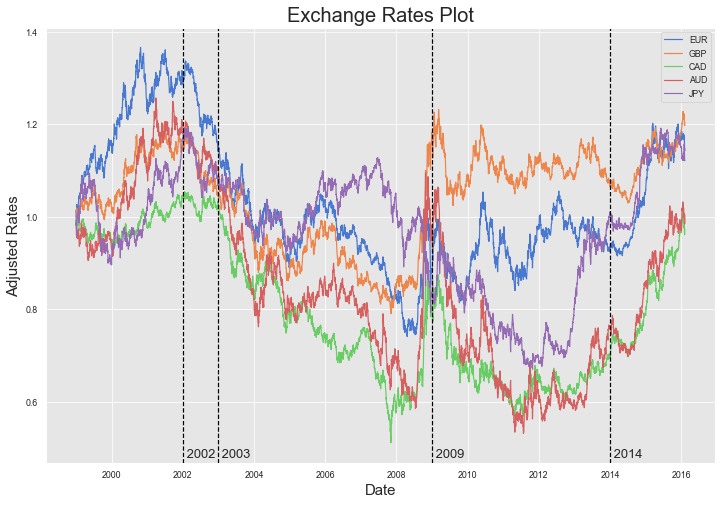

In [331]:
fig,ax = plt.subplots(figsize=(12,8))
_ = fx_rates.plot(legend=True,ax =ax)
_ = ax.set_xlabel('Date',fontsize = 15)
_ = ax.set_ylabel('Adjusted Rates',fontsize = 15)
_ = ax.axvline(x=datetime.date(2001,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2001,12,31),0.48,' 2002',rotation=0,fontsize=13)
_ = ax.axvline(x=datetime.date(2002,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2002,12,31),0.48,' 2003',rotation=0,fontsize=13)
_ = ax.axvline(x=datetime.date(2008,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2008,12,31),0.48,' 2009',rotation=0,fontsize=13)
_ = ax.axvline(x=datetime.date(2013,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2013,12,31),0.48,' 2014',rotation=0,fontsize=13)
plt.savefig('../book/chapters/chapter_mvts/figures/pexchrate.eps',format='eps',dpi=100,bbox_inches='tight')
_ = ax.set_title('Exchange Rates Plot',fontsize = 20)
plt.show()

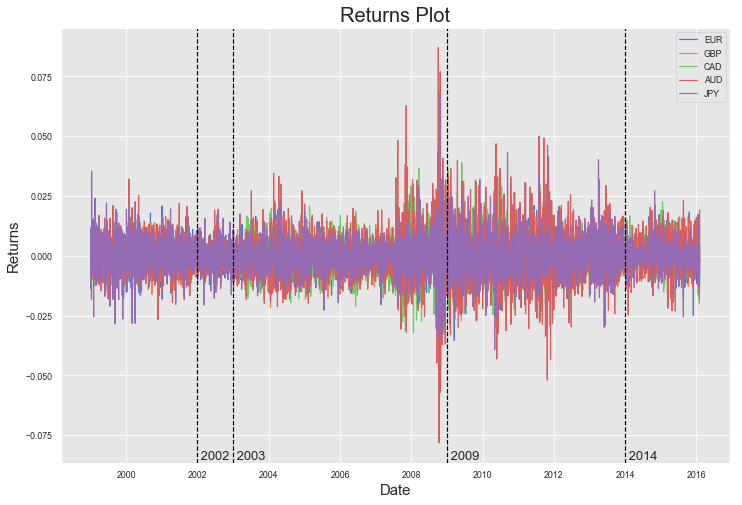

In [332]:
fig,ax = plt.subplots(figsize=(12,8))
_ = fx_rates.pct_change(1).plot(legend=True,ax =ax)
_ = ax.set_xlabel('Date',fontsize = 15)
_ = ax.set_ylabel('Returns',fontsize = 15)
_ = ax.axvline(x=datetime.date(2001,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2001,12,31),-0.085,' 2002',rotation=0,fontsize=13)
_ = ax.axvline(x=datetime.date(2002,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2002,12,31),-0.085,' 2003',rotation=0,fontsize=13)
_ = ax.axvline(x=datetime.date(2008,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2008,12,31),-0.085,' 2009',rotation=0,fontsize=13)
_ = ax.axvline(x=datetime.date(2013,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2013,12,31),-0.085,' 2014',rotation=0,fontsize=13)
plt.savefig('../book/chapters/chapter_mvts/figures/preturns.eps',format='eps',dpi=100,bbox_inches='tight')
_ = ax.set_title('Returns Plot',fontsize = 20)
plt.show()

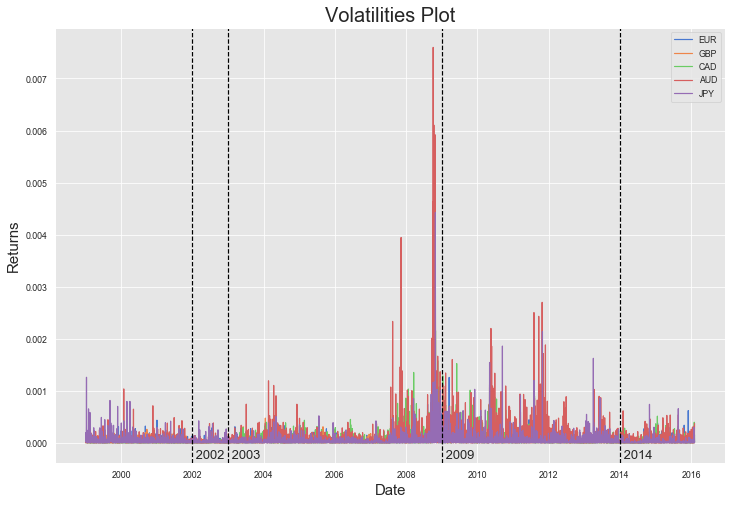

In [333]:
fig,ax = plt.subplots(figsize=(12,8))
_ = fx_rates.pct_change(1).pow(2).plot(legend=True,ax =ax)
_ = ax.set_xlabel('Date',fontsize = 15)
_ = ax.set_ylabel('Returns',fontsize = 15)
_ = ax.axvline(x=datetime.date(2001,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2001,12,31),-0.0003,' 2002',rotation=0,fontsize=13)
_ = ax.axvline(x=datetime.date(2002,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2002,12,31),-0.0003,' 2003',rotation=0,fontsize=13)
_ = ax.axvline(x=datetime.date(2008,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2008,12,31),-0.0003,' 2009',rotation=0,fontsize=13)
_ = ax.axvline(x=datetime.date(2013,12,31),linestyle='--',color='k')
_ = plt.text(datetime.date(2013,12,31),-0.0003,' 2014',rotation=0,fontsize=13)
plt.savefig('../book/chapters/chapter_mvts/figures/pvolat.eps',format='eps',dpi=100,bbox_inches='tight')
_ = ax.set_title('Volatilities Plot',fontsize = 20)
plt.show()

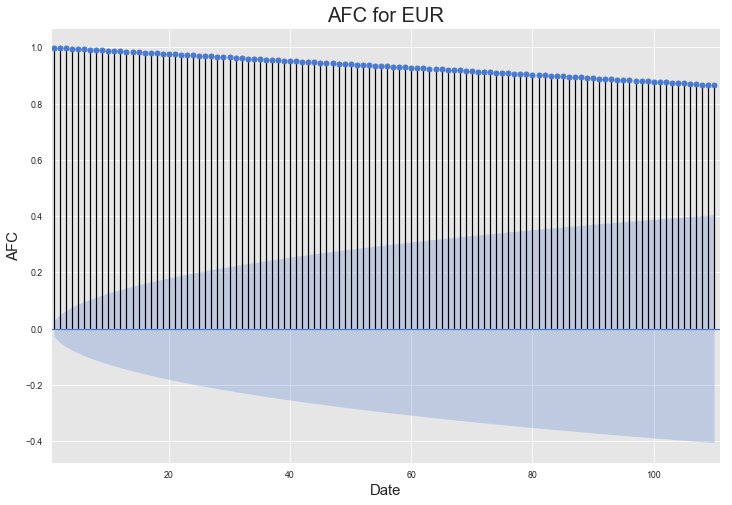

In [337]:
fig,ax = plt.subplots(figsize=(12,8))
_ = smt.graphics.plot_acf(fx_rates['EUR'], lags=110, ax=ax, alpha=0.05,title='')
_ = ax.set_xlabel('Date',fontsize = 15)
_ = ax.set_ylabel('AFC',fontsize = 15)
_ = ax.set_xlim((0.5,111))
plt.savefig('../book/chapters/chapter_mvts/figures/pautofun.eps',format='eps',dpi=100,bbox_inches='tight')
_ = ax.set_title('AFC for EUR',fontsize = 20)
plt.show()

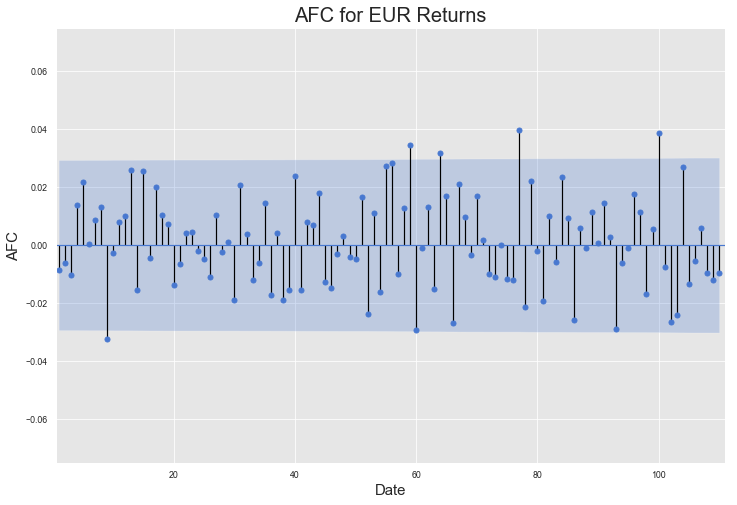

In [343]:
fig,ax = plt.subplots(figsize=(12,8))
_ = smt.graphics.plot_acf(fx_rates['EUR'].pct_change(1).dropna(), lags=110, ax=ax, alpha=0.05,title='')
_ = ax.set_xlabel('Date',fontsize = 15)
_ = ax.set_ylabel('AFC',fontsize = 15)
_ = ax.set_ylim((-0.075,0.075))
_ = ax.set_xlim((0.5,111))
plt.savefig('../book/chapters/chapter_mvts/figures/pautofun2.eps',format='eps',dpi=100,bbox_inches='tight')
_ = ax.set_title('AFC for EUR Returns',fontsize = 20)
plt.show()

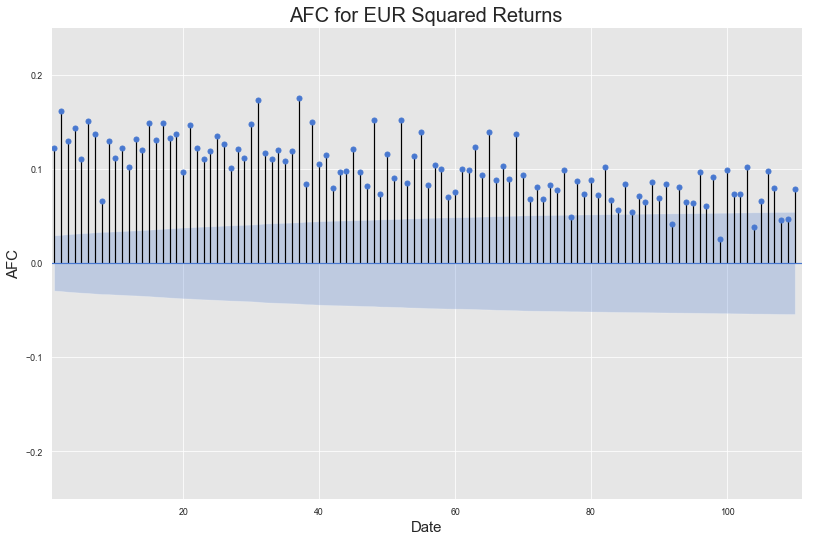

In [341]:
fig,ax = plt.subplots(figsize=(12,8))
_ = smt.graphics.plot_acf(fx_rates['EUR'].pct_change(1).pow(2).dropna(), lags=110, ax=ax, alpha=0.05,title='')
_ = ax.set_xlabel('Date',fontsize = 15)
_ = ax.set_ylabel('AFC',fontsize = 15)
_ = ax.set_ylim((-0.25,0.25))
_ = ax.set_xlim((0.5,111))
plt.tight_layout()
plt.savefig('../book/chapters/chapter_mvts/figures/pautofun3.eps',format='eps',dpi=100,bbox_inches='tight')
_ = ax.set_title('AFC for EUR Squared Returns',fontsize = 20)
plt.show()